# Importing Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset


In [2]:
df= pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [11]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [12]:
df.shape

(119390, 32)

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.info() # adr = Average Daily Rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [23]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='mixed', errors='coerce')

In [24]:
df.info() #checks the datatype of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [26]:
df.describe(include = 'object') #print all the columns with datatype = 'object'

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [28]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique()) #prints only the unique values
    print('-'*50) #seperate the values according to the columns

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [29]:
df.isnull().sum() #prints the no. of missing values each columns contains

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16339
company         

In [3]:
#df.drop(['company','agent'], axis = 1, inplace = True) delete the two columns 'company', 'agent' as these columns contains so many missing values which is hectic to handle and the columns are not necessary also, inplace=True make changes in the actual csv file

In [40]:
df.dropna(inplace = True) #delete the other columns: country,children which are not necessary and the changes are made to the actual csv file using inplace=True

In [42]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103051.000000,6798.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.692541,189.238894,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774339,131.665342,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,178.500000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df = df[df['adr'] < 5000] #removes the outliers in 'adr' column which are greater than 5000

In [10]:
df.describe() #again checking the outliers are removed or not

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103050.000000,6798.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.693265,189.238894,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774632,131.665342,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,178.500000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


In [12]:
df = df[df['adr'] > -1] #removes the outliers in 'adr' column which are less than -1 that is all negative values will be removed

In [13]:
df.describe() #again checking the outliers are removed or not

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119384.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,103049.000000,6798.000000,119388.000000,119388.000000,119388.000000,119388.000000
mean,0.370414,104.011232,2016.156548,27.165435,15.798254,0.927581,2.500285,1.856401,0.103892,0.007949,0.031904,0.087119,0.137082,0.221103,86.691457,189.238894,2.321188,101.787650,0.062519,0.571372
std,0.482918,106.863481,0.707478,13.605100,8.780807,0.998579,1.908270,0.579266,0.398565,0.097437,0.175746,0.844343,1.497440,0.652287,110.773650,131.665342,17.594866,48.152738,0.245293,0.792802
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,178.500000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


# Data Analysis and Visualizations

<BarContainer object of 2 artists>

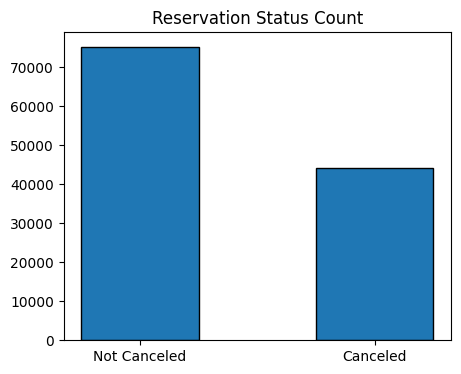

In [17]:
cancelled_percent = df['is_canceled'].value_counts(normalize = True) #percentage of cancellation is counted value: 0 means not canceled, value: 1 means canceled and normalization is done that is both values are divided by total count and percentage of both the values are shown
cancelled_percent #print the percentage

plt.figure(figsize = (5,4)) #setting the size of the plot
plt.title('Reservation Status Count')
plt.bar(['Not Canceled', 'Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width=0.5)

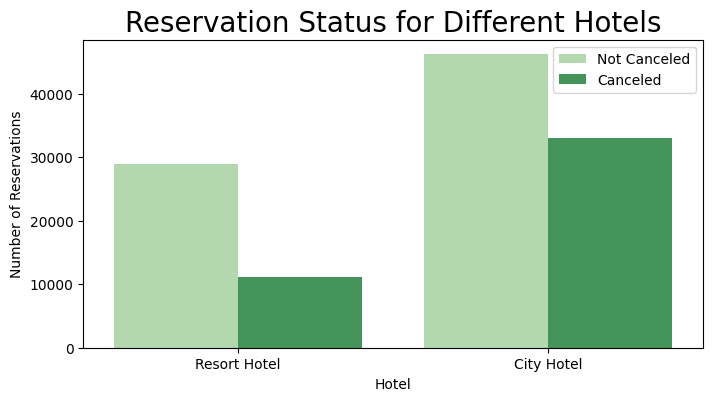

In [45]:
# Set figure size
plt.figure(figsize=(8, 4))

# Correct the 'is_canceled' column name in the hue parameter
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Greens')

# Get legend labels and set legend position
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set the title and axis labels
plt.title('Reservation Status for Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

# Update the legend labels
plt.legend(['Not Canceled', 'Canceled'])

# Show the plot
plt.show()


In [9]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True) # To check percentage of cancelled in Resort Hotels

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [8]:
resort_hotel = df[df['hotel'] == 'City Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True) # To check percentage of cancelled in City Hotels

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [46]:
# Separate the DataFrame into two based on the hotel type
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Group by reservation_status_date and calculate the mean of adr
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()


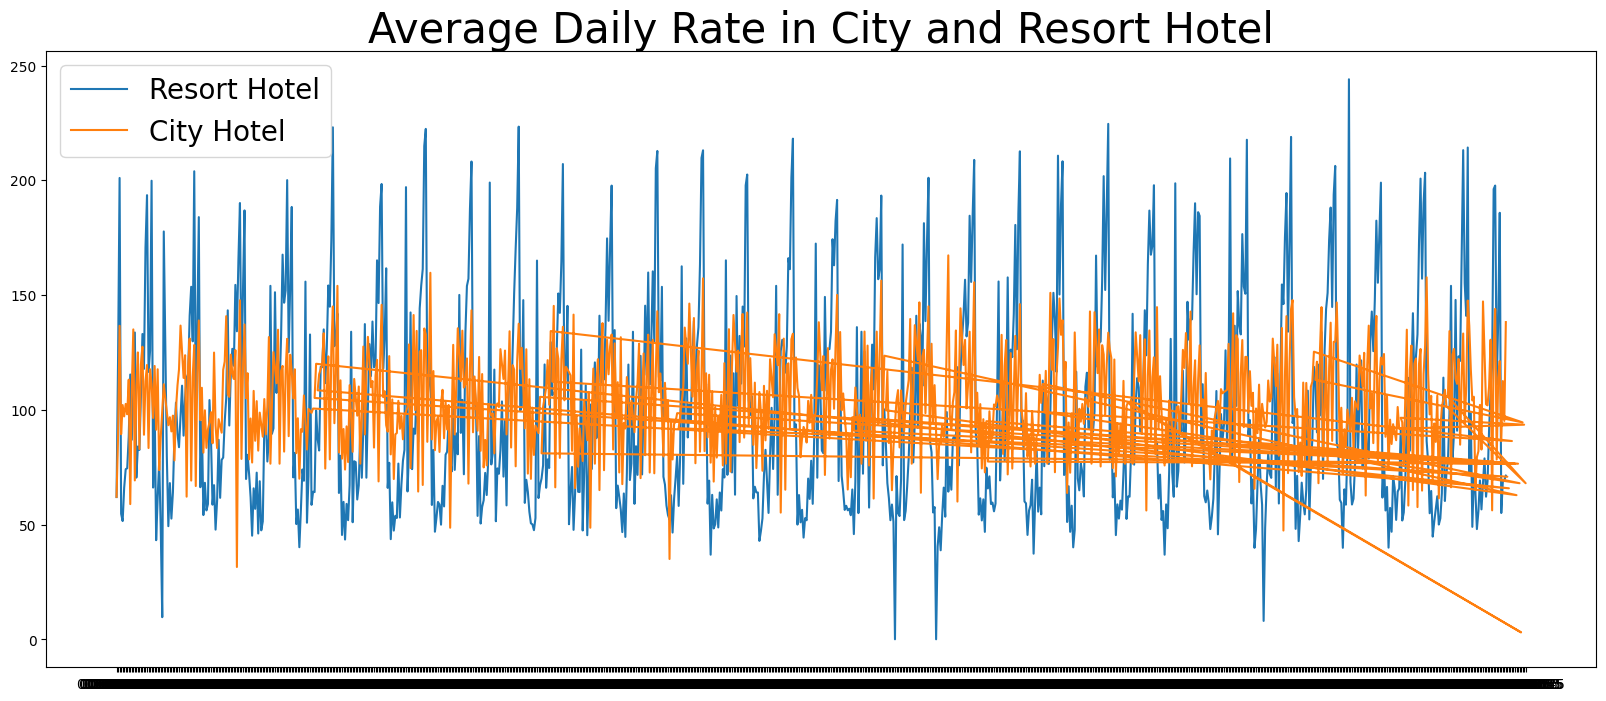

In [47]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize = 20)
plt.show()

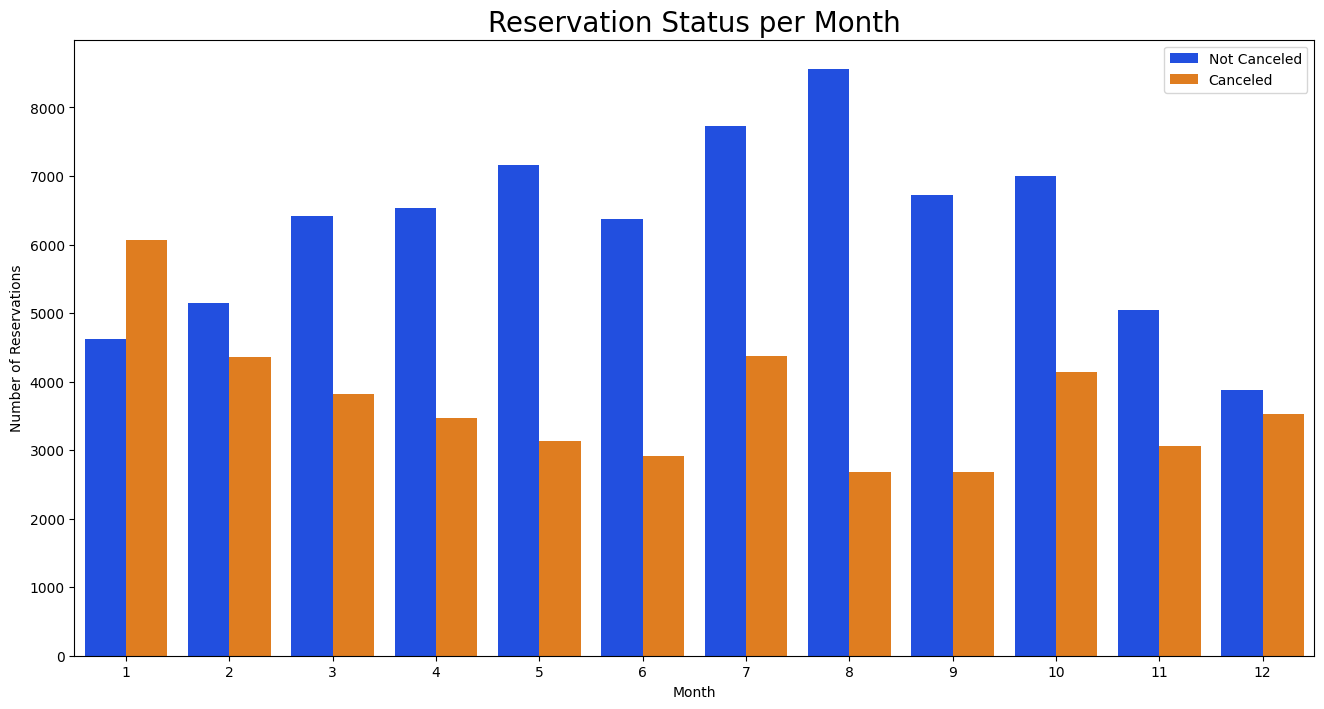

In [49]:
# Ensure 'reservation_status_date' is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

# Extract the month from the 'reservation_status_date'
df['month'] = df['reservation_status_date'].dt.month

# Plot the data
plt.figure(figsize=(16, 8))  # Set figure size
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')

# Get legend labels and set legend position
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set title and axis labels
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')

# Update the legend labels
plt.legend(['Not Canceled', 'Canceled'])

# Show the plot
plt.show()


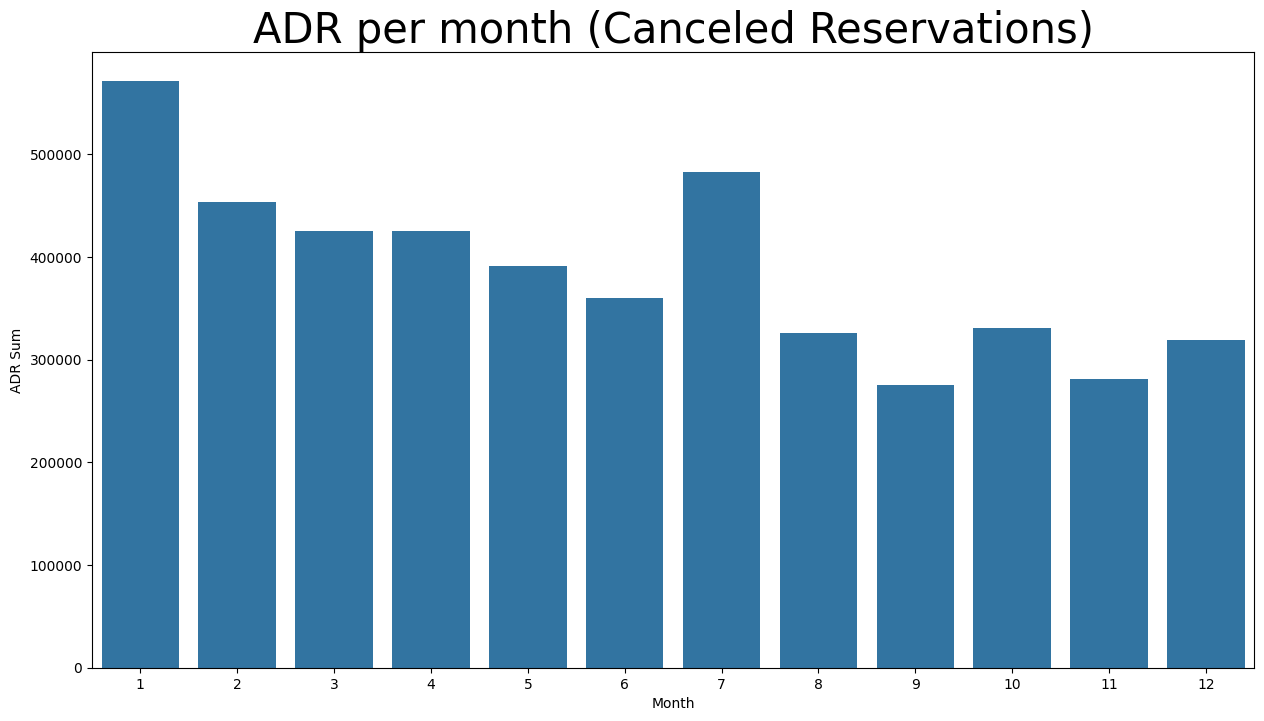

In [52]:
# Create the bar plot
plt.figure(figsize=(15, 8))
plt.title('ADR per month (Canceled Reservations)', fontsize=30)
sns.barplot(x='month', y='adr', data=adr_per_month)
plt.xlabel('Month')
plt.ylabel('ADR Sum')
plt.show()


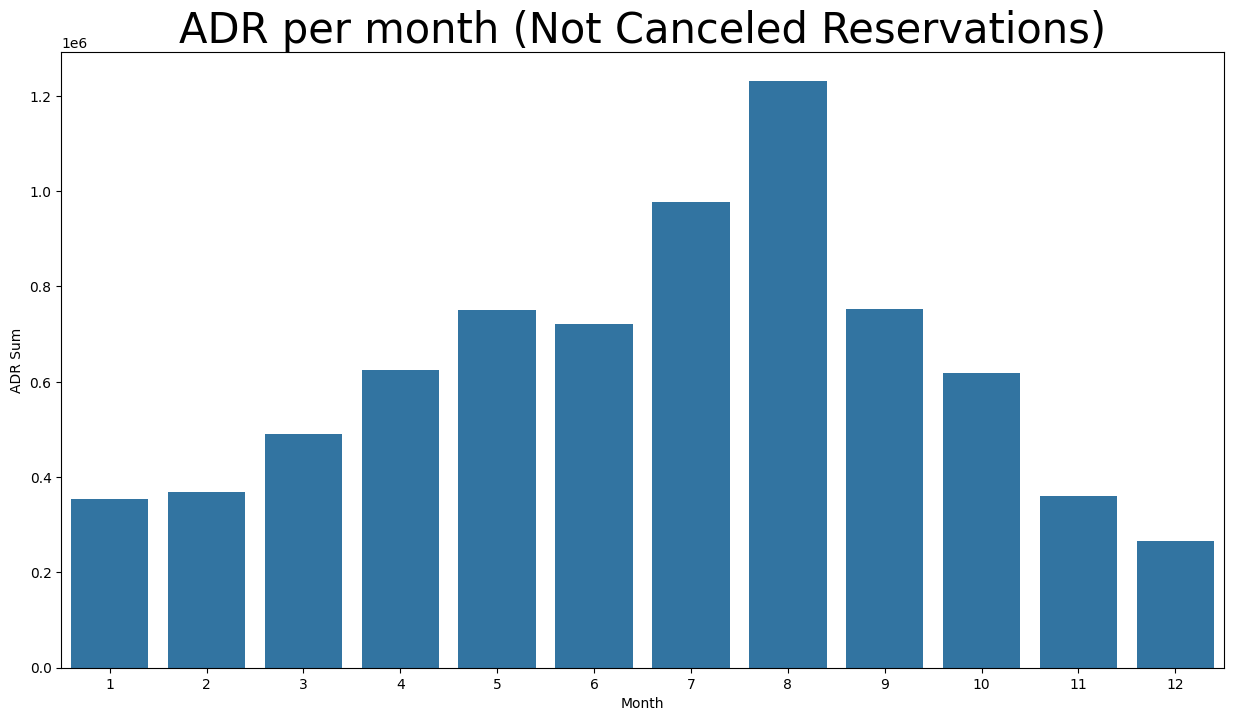

In [54]:
# Filter canceled reservations
canceled_df = df[df['is_canceled'] == 0]

# Check for missing month values (if expected)
if canceled_df['month'].isnull().any():
    print("Warning: Some canceled reservations might be missing month data!")

# Group by month and calculate ADR sum (if month data exists)
if not canceled_df['month'].isnull().all():
    adr_per_month = canceled_df.groupby('month')[['adr']].sum().reset_index()
    
    # Create the bar plot (if data available)
    plt.figure(figsize=(15, 8))
    plt.title('ADR per month (Not Canceled Reservations)', fontsize=30)
    sns.barplot(x='month', y='adr', data=adr_per_month)  # Explicit x and y arguments
    plt.xlabel('Month')
    plt.ylabel('ADR Sum')
    plt.show()


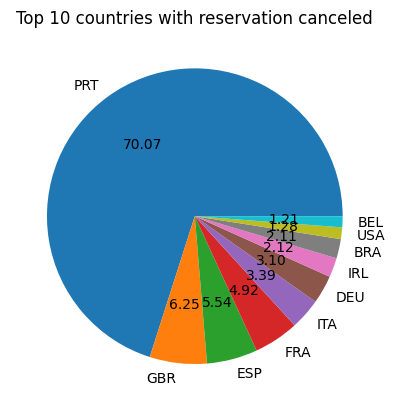

In [4]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [5]:
# Hotels should be advised to run ads/marketing, campaigns in Portulgal and do some surveys to find the route cause of maximum calculation and decrease the cancelation, to increase facilities of the hotel at a comperative cheaper prices in the hotels at Portugal, add promotional reward systems and more rewards for customers so that they get attracted. 

In [7]:
df['market_segment'].value_counts() # to observe how many customers were brought by which travel agents

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [10]:
df['market_segment'].value_counts(normalize=True) # to observe Percentage value of how many customers were brought by which travel agents

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [13]:
# Online Travel Agents bring maximum (47% approx) of the customers
# Offline Travel Agents bring only 20% (approx) of the customers
# Only 11% approx comes directly

In [16]:
cancelled_data['market_segment'].value_counts(normalize=True) # To obseerve percentage of cusomers who cancelled their reservation categorized by their Agents

market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

In [17]:
# We can see that the reservation on Online Travel Agents were high but ther cancelation rate is also high (47% approx).
# Here we can predict that the expectation of the customers are not matched as per their requirements shown during online reservation

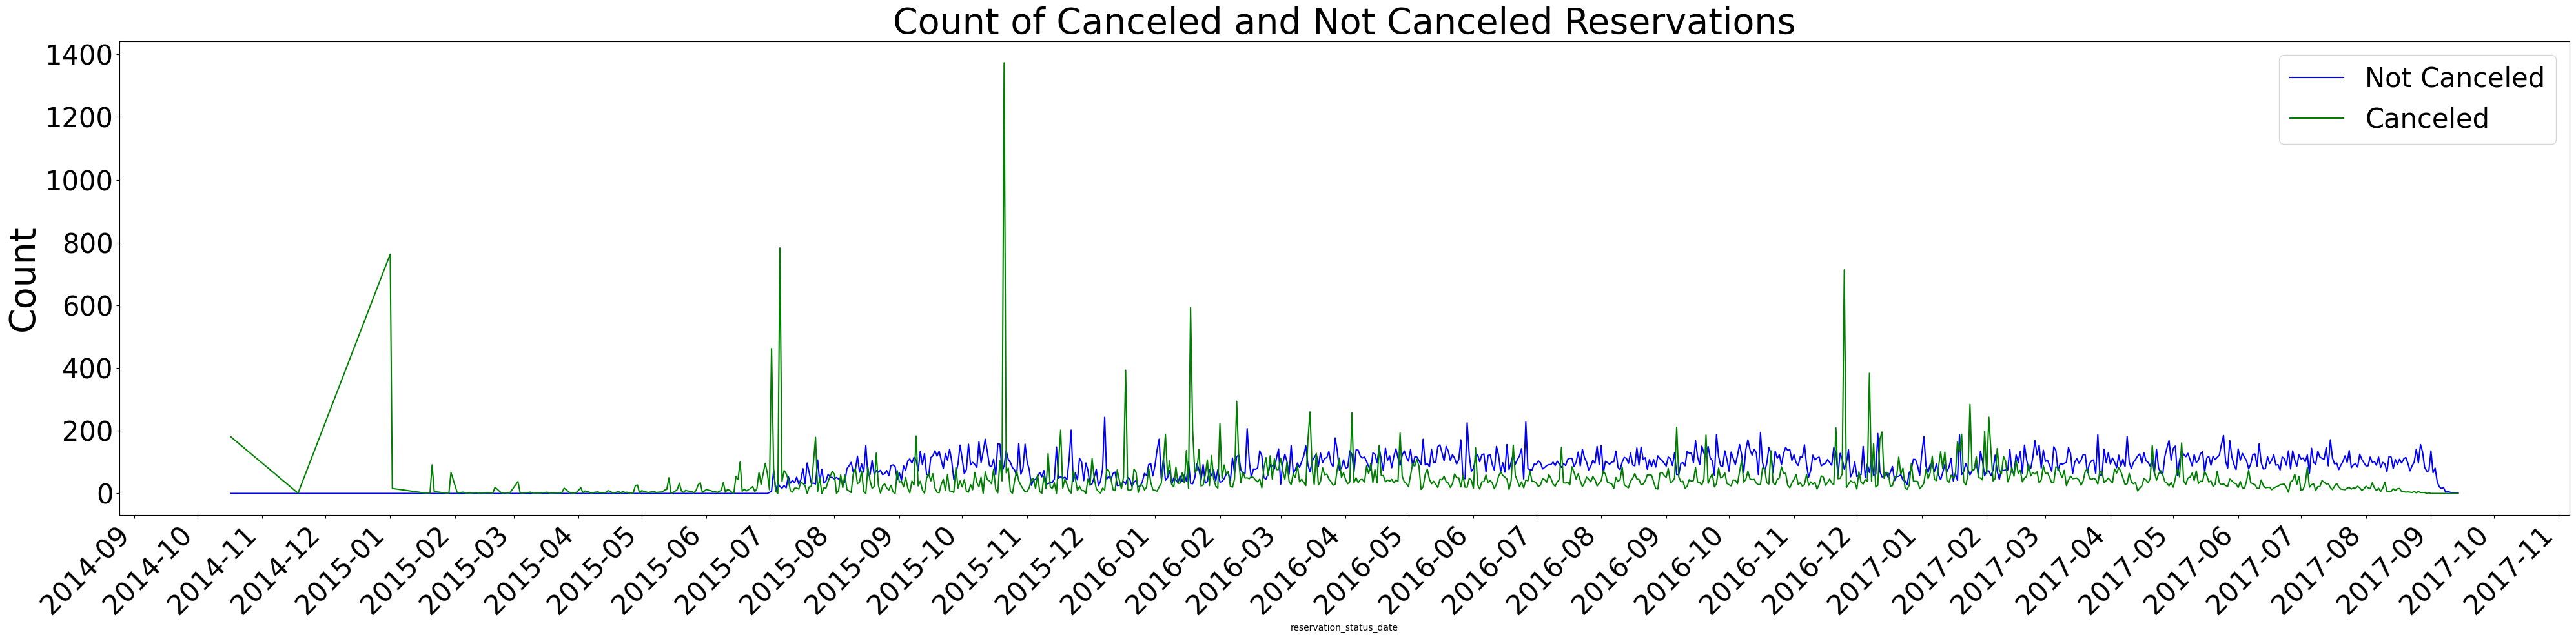

In [72]:
# Ensure 'reservation_status_date' is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Group by reservation_status_date and count canceled (1) and not canceled (0)
counts_df = df.groupby('reservation_status_date')['is_canceled'].value_counts().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(40, 10))
plt.title('Count of Canceled and Not Canceled Reservations', fontsize=40)

# Plot Canceled and Not Canceled data
counts_df.plot(ax=plt.gca(), color=['blue', 'green'], legend=True)
plt.gca().set_title('Count of Canceled and Not Canceled Reservations', fontsize=40)
plt.gca().set_ylabel('Count', fontsize=40)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)

# Display legend
plt.legend(['Not Canceled', 'Canceled'], fontsize=30)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()

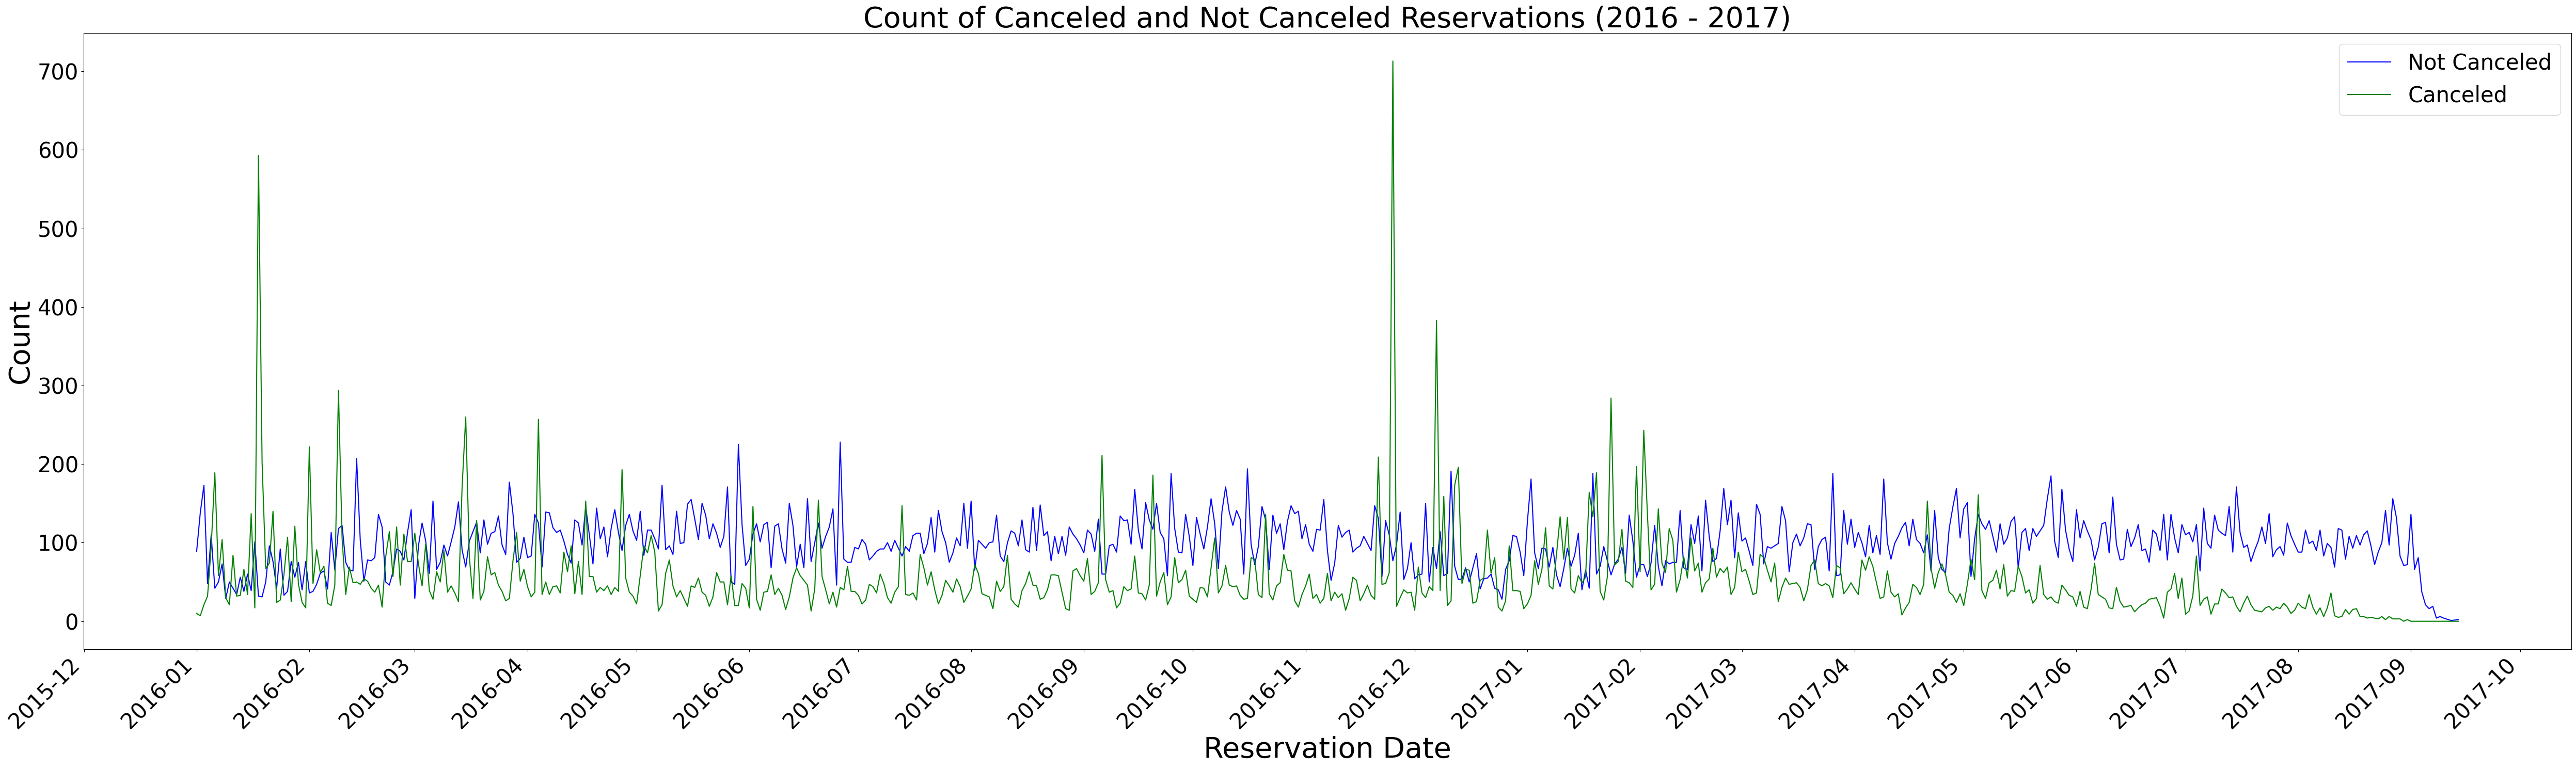

In [74]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Filter the DataFrame for reservations between specified dates
df_filtered = df[(df['reservation_status_date'] >= '2016-01-01') & (df['reservation_status_date'] <= '2017-09-30')]

# Count canceled and not canceled reservations by date
counts_df = df_filtered.groupby('reservation_status_date')['is_canceled'].value_counts().unstack(fill_value=0)

# Create the plot with increased figure size
plt.figure(figsize=(50, 15))
plt.title('Count of Canceled and Not Canceled Reservations (2016 - 2017)', fontsize=40)

# Plot counts with distinct colors
counts_df.plot(ax=plt.gca(), color=['blue', 'green'], legend=True)

# Format x-axis to display Year-Month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Set axis labels and font sizes
plt.ylabel('Count', fontsize=40)
plt.xlabel('Reservation Date', fontsize=40)  # Set x-label font size to 40
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)

# Adjust layout for better spacing and display the legend
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.legend(['Not Canceled', 'Canceled'], fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()